In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys

/mnt/home/bbhattarai/.local/lib/python3.7/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)



In [2]:
!hostname

pcn-1-38


In [3]:
datapath="/mnt/home/bbhattarai/B3/"
freq_datapath="/mnt/home/bbhattarai/freq_data/"

In [4]:
snapshot=302
freq_datafile="DiskActions"+str(snapshot)+".npy"
freqs= np.load(freq_datapath+freq_datafile)

In [5]:
Jrdisk=freqs[0]
Jphidisk=freqs[1]
Jzdisk=freqs[2]
Trdisk=freqs[3]
Tphidisk=freqs[4]
Tzdisk=freqs[5]
Ordisk=freqs[6]
Ophidisk=freqs[7]
Ozdisk=freqs[8]
idd_from_freqs=freqs[9]

In [6]:
angle_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
datafilename="0_to_336_B3_fft_barangles_combined.ang"
ang_stored = open(angle_datapath+datafilename,'rb')
all_bangles=pickle.load(ang_stored)
print(len(all_bangles))

337


In [8]:
times=np.genfromtxt(freq_datapath+'times_B3.txt',dtype='str')
#print(len(times))
time=list()
for i in range(len(times)):
    t=float(times[i][11:-2])/1000 # in Gyr
    time.append(t)
#plt.plot(all_bangles)
time=np.array(time)
time=time*9.778145
#print(len(time))

# Plotting bar angle (in radians) vs time

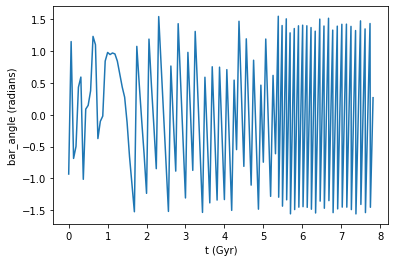

In [9]:
fig1=plt.figure()
ax=fig1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,bangle_radians)
plotname="bar_angle_vs_time.jpg"
#fig1.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()

# plotting in degrees

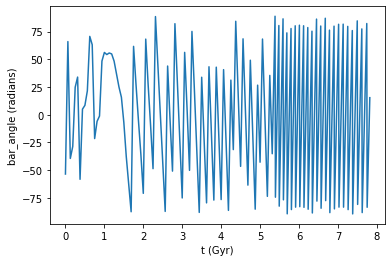

In [10]:
fig3=plt.figure()
ax=fig3.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
#bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,all_bangles)
plotname="bar_angle_vs_time.jpg"
#fig3.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()

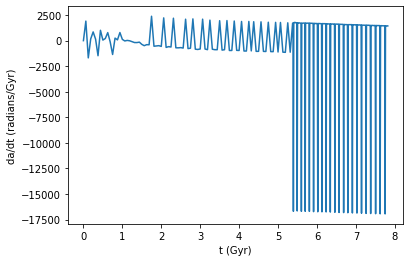

In [11]:
d_angle=np.diff(all_bangles)
dt=np.diff(time)
da_dt=d_angle/dt
zero=np.array([0])
da_dt_z=np.concatenate((zero,da_dt))
#print(da_dt)
#print(d_angle)

fig2=plt.figure()
ax=fig2.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,da_dt_z)
plotname="da_dt_vs_time.jpg"
#fig2.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()
plt.show()

# Calculating da_dt numerically


In [12]:
#converted all angles to positive
a=np.array(all_bangles)
for i in range(len(a)):
    if (a[i]<0):
        a[i]=360+a[i]
print(a)
t=time

[306.53921358  66.0167189  320.61380861 331.44334948  24.80376568
  33.98864023 301.78757389   5.06828755   8.49451696  21.55153057
  70.6844322   63.17907    338.53796534 354.07720006 358.82897116
  48.43689184  56.20439186  54.3029865   55.73503823  54.85909857
  48.35388832  36.76590418  25.03162224  15.8154956  353.05478945
 322.3008153  297.74946473 272.52658286  61.68738362  27.51284298
 355.02127595 324.34036764 289.12377703  68.24084394  26.82731591
 350.21973167 311.38018587  88.56069622  44.75467381   0.80829431
 318.22218516 272.82678022  43.95379756 355.25446969 309.16968231
  82.14127031  29.94374233 336.03236754 284.9686309   56.27463067
   5.00305736 309.85498141  75.17154236  22.70325459 327.39819974
 271.93250791  33.84438932 336.00339591 280.53646911  43.29363374
 343.12158447 283.0483536   42.92984002 343.56264616 283.51656329
  40.71057216 337.25908664 273.7639204   31.24750008 328.57162932
  84.32392206  18.80066827 313.46054994  68.48896487   2.81913508
 296.53504

66.016719 - 306.539214 = -240.522495
da <0 found
da is now 119.47750531657223
320.613809 - 66.016719 = 254.597090
d_a > 180 found
da is now:  74.59708970677158
331.443349 - 320.613809 = 10.829541
24.803766 - 331.443349 = -306.639584
da <0 found
da is now 53.36041620352616
33.988640 - 24.803766 = 9.184875
301.787574 - 33.988640 = 267.798934
d_a > 180 found
da is now:  87.7989336592488
5.068288 - 301.787574 = -296.719286
da <0 found
da is now 63.28071365545247
8.494517 - 5.068288 = 3.426229
21.551531 - 8.494517 = 13.057014
70.684432 - 21.551531 = 49.132902
63.179070 - 70.684432 = -7.505362
da <0 found
da is now 352.4946378090503
d_a > 180 found
da is now:  172.4946378090503
338.537965 - 63.179070 = 275.358895
d_a > 180 found
da is now:  95.35889533425114
354.077200 - 338.537965 = 15.539235
358.828971 - 354.077200 = 4.751771
48.436892 - 358.828971 = -310.392079
da <0 found
da is now 49.607920684241115
56.204392 - 48.436892 = 7.767500
54.302986 - 56.204392 = -1.901405
da <0 found
da is now

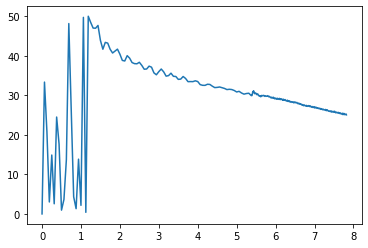

In [13]:
dadt=list()
da=list()
for i in range(1,len(t),1):
    #d=(a[i-1]-a[i])/(t[i-1]-t[i])
    d_a=(a[i]-a[i-1])
    print("%f - %f = %f"%(a[i],a[i-1],d_a))
    d_t=(t[i]-t[i-1])
    if d_a<0:
        print("da <0 found")
        d_a=a[i]+(360-a[i-1])  #if change in angle is negative, it is due to crossing the origin
        print("da is now",d_a)
    if d_a>180:                #if change in angle is greater than 180, the change in angle value we have is flipped by 180
        print("d_a > 180 found")
        d_a=d_a-180
        print("da is now: ",d_a)    
    da.append(d_a)
    #print(d_a)
    d_a_rad=np.deg2rad(d_a)
    d=d_a_rad/d_t
    dadt.append(d)

dadt=np.array(dadt)

zero=np.array([0])
dadtz=np.concatenate((zero,dadt))
#print(len(dadt))
#print(dadt)
plt.plot(time,dadtz)


# Fixing angles

Plot generated and saved to file:  da_dt_vs_time_B3_using_fft_pattern_speed.jpg


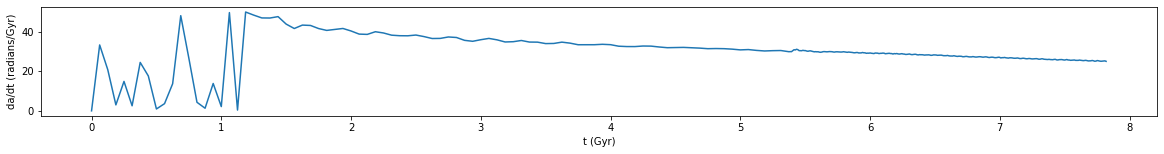

In [15]:
#import matplotlib
#from matplotlib.ticker import FuncFormatter, MultipleLocator
fig4=plt.figure(figsize=(20,2))
ax=fig4.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
#ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
#ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
ax.plot(time,dadtz)
plotname="da_dt_vs_time_B3_using_fft_pattern_speed.jpg"
print("Plot generated and saved to file: ",plotname)
fig4.savefig(angle_datapath+plotname,bbox_inches="tight")
#plt.tight_layout()
plt.show()

# Finding the slope of the change in bar angle 

In [16]:
t_initial=t[32]
print(t_initial)
t_final=t[233]
print(t_final)

dadtz_initial=dadtz[32]
print(dadtz_initial)

dadtz_final=dadtz[233]
print(dadtz_final)
slope=(dadtz_final-dadtz_initial)/(t_final-t_initial)
print(slope)
a_tan=np.arctan(slope)
print(np.rad2deg(a_tan))
print(np.tan(a_tan))

2.000006133268
6.812396464549
40.429924230537054
27.235571540673835
-2.7417461555640363
-69.96151627993079
-2.7417461555640363


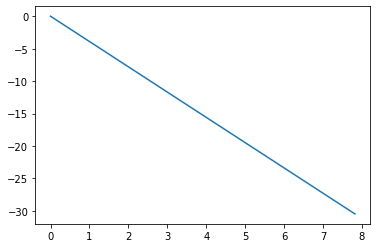

In [72]:
plt.plot(time,slope*time)

Plot generated and saved to file:  da_dt_vs_time.jpg


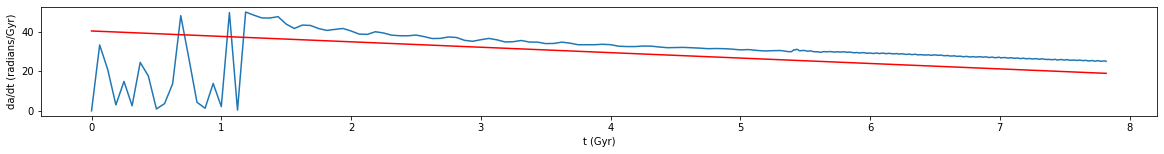

In [18]:

#import matplotlib
#from matplotlib.ticker import FuncFormatter, MultipleLocator
fig4_1=plt.figure(figsize=(20,2))
ax=fig4_1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
#ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
#ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
ax.plot(time,dadtz)
ax.plot(time,(slope*time+dadtz_initial),c="red")
plotname="da_dt_vs_time.jpg"
print("Plot generated and saved to file: ",plotname)
#fig4_1.savefig(plotname,bbox_inches="tight")
#plt.tight_layout()
plt.show()

# Saving the pattern speed (frequency) of the bar in pickle file

In [19]:

datafilename="fft_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
dadtz_kms_kpc=dadtz*3.08567758/3.15576
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(dadtz_kms_kpc, output)



337
[0.00000000e+00 3.43996246e+01 3.52236189e+01 3.30402432e+01
 3.65906015e+01 4.47825103e+01 3.33086185e+01 4.50562916e+01
 1.03764344e+01 5.46042158e+00 1.06495088e+01 1.63839848e+00
 2.51179576e+01 1.09225287e+00 5.46119813e-01 2.18420683e+01
 3.98673647e+01 7.64579634e+00 4.69596915e+01 1.63838931e+00
 4.64208952e+01 4.42349988e+01 9.68591228e-06 4.50527651e+01
 4.45059722e+01 3.82265893e+01 4.42329307e+01 4.15031517e+01
 4.12365716e+01 4.06833601e+01 3.98648716e+01 3.90457266e+01
 4.34137993e+01 3.60422180e+01 3.60416493e+01 4.06903729e+01
 3.76804969e+01 3.63146901e+01 3.98648743e+01 3.54961137e+01
 3.82259925e+01 3.68613474e+01 3.54961238e+01 3.46818551e+01
 3.82265971e+01 3.65882832e+01 3.38573251e+01 3.57691545e+01
 3.44039321e+01 3.60416512e+01 3.44039277e+01 3.33112193e+01
 3.41362180e+01 3.74074478e+01 3.19460092e+01 3.65883057e+01
 3.16734614e+01 3.24920894e+01 3.60422253e+01 3.22195376e+01
 3.16779202e+01 3.44039321e+01 3.22195518e+01 3.19460054e+01
 3.44039295e+01 3.08

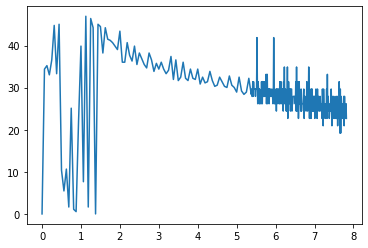

In [ ]:
datafilename="fft_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
ps_stored = open(save_datapath+datafilename,'rb')
ps=pickle.load(ps_stored)
print(len(ps))
print(ps)

plt.plot(time,ps)